In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
%matplotlib inline

In [ ]:
crisis_1 = pd.read_excel('../data/crisis1.xlsx', skiprows = [0,1])

In [ ]:
crisis_2 = pd.read_excel('../data/crisis2.xlsx',skiprows = [0,1])

In [125]:
call_volume = pd.read_csv('../data/call_volume.csv')

In [ ]:
crisis_1.head()

In [ ]:
crisis_2.head()

In [126]:
call_volume.head()

,Report Info,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,Queue:,"AWARE,Community Response,Crisis Eng,Crisis Eng...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,"Crisis Spanish,Crisis Spanish PRIORITY,",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,"Lifeline,MHART,Pet Loss,REDLINE,Referral Line,",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,SAMHSA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Start Date:,1/1/2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
crisis_1.describe()

In [ ]:
crisis_2.describe()

In [ ]:
crisis_1.info()

In [ ]:
crisis_2.info()

In [ ]:
call_volume.info()

In [ ]:
crisis_1.value_counts()

In [ ]:
crisis_1.dropna(how='all', axis=1, inplace=True)

In [ ]:
crisis_2.dropna(how='all', axis=1, inplace=True)

In [ ]:
crisis_1.isnull().sum()

In [ ]:
crisis_2.isnull().sum()

In [ ]:
crisis_1.name.nunique()

In [ ]:
#Reading in call_volume how Abi did it so we can work together on this part

# 2020 DataFrames

In [ ]:
stats_2020 = pd.read_excel('../data/call_volume.xlsx', sheet_name='2020', skiprows=10, nrows=9, usecols='A:B')
stats_2020.rename(inplace=True, columns={'Total Calls':'Category', 'Unnamed: 1':'Total'})
#stats_2020['Total'].sub(' calls', '') this didn't work the way I wanted it to, commenting it out until I figure out how to fix it
stats_2020

In [ ]:
queue_dist_2020 = pd.read_excel('../data/call_volume.xlsx', sheet_name='2020', skiprows=23, nrows=12, usecols='A:I')
queue_dist_2020

In [ ]:
month_dist_2020 = pd.read_excel('../data/call_volume.xlsx', sheet_name='2020', skiprows=39, nrows=12, usecols='A:K')
month_dist_2020

In [127]:
day_dist_2020 = pd.read_excel('../data/call_volume.xlsx', sheet_name='2020', skiprows=55, nrows=7, usecols='A:K')
day_dist_2020

,Day,Received,Answered,Unanswered,Transfers,% Answ,% Unansw,Avg Durat.,Avg Wait,Logins,Logoff
0,Sunday,6864,3576,3174,114,0.5376,0.4624,00:10:17,00:01:28,3641,3624
1,Monday,6811,4472,2187,152,0.6789,0.3211,00:08:38,00:00:59,5549,5576
2,Tuesday,6289,4138,2046,105,0.6747,0.3253,00:09:34,00:01:06,5544,5620
3,Wednesday,6608,4463,1981,164,0.7002,0.2998,00:09:13,00:00:58,5538,5696
4,Thursday,6370,4212,2003,155,0.6856,0.3144,00:09:34,00:00:59,4696,4779
5,Friday,6119,3939,2032,148,0.6679,0.3321,00:09:15,00:01:06,4646,4383
6,Saturday,6711,3683,2890,138,0.5694,0.4306,00:09:54,00:01:25,3718,3635


In [ ]:
queue_answered_2020 = pd.read_excel('../data/call_volume.xlsx', sheet_name='2020', skiprows=66, nrows=10, usecols='A:C')
queue_answered_2020

In [ ]:
service_speed_2020 = pd.read_excel('../data/call_volume.xlsx', sheet_name='2020', skiprows=80, nrows=10, usecols='A:D')
service_speed_2020

In [ ]:
abandon_rate_2020 = pd.read_excel('../data/call_volume.xlsx', sheet_name='2020', skiprows=94, nrows=10, usecols='A:D')
abandon_rate_2020

# 2021 DataFrames

In [ ]:
stats_2021 = pd.read_excel('../data/call_volume.xlsx', sheet_name='2021', skiprows=10, nrows=9, usecols='A:B')
stats_2021.rename(inplace=True, columns={'Total Calls':'Category', 'Unnamed: 1':'Total'})
stats_2021

In [ ]:
queue_dist_2021 = pd.read_excel('../data/call_volume.xlsx', sheet_name='2021', skiprows=23, nrows=11, usecols='A:I')
queue_dist_2021

In [ ]:
month_dist_2021 = pd.read_excel('../data/call_volume.xlsx', sheet_name='2021', skiprows=38, nrows=12, usecols='A:K')
month_dist_2021

In [ ]:
hour_dist_2021 = pd.read_excel('../data/call_volume.xlsx', sheet_name='2021', skiprows=54, nrows=24, usecols='A:K')
hour_dist_2021

In [ ]:
day_dist_2021 = pd.read_excel('../data/call_volume.xlsx', sheet_name='2021', skiprows=82, nrows=7, usecols='A:K')
day_dist_2021

In [ ]:
service_speed_2021 = pd.read_excel('../data/call_volume.xlsx', sheet_name='2021', skiprows=93, nrows=10, usecols='A:D')
service_speed_2021

In [ ]:
abandon_rate_2021 = pd.read_excel('../data/call_volume.xlsx', sheet_name='2021', skiprows=107, nrows=10, usecols='A:D')
abandon_rate_2021

# 2022 DataFrames (through April)

In [ ]:
stats_2022 = pd.read_excel('../data/call_volume.xlsx', sheet_name='2022', skiprows=7, nrows=9, usecols='A:B')
stats_2022.rename(inplace=True, columns={'Total Calls':'Category', 'Unnamed: 1':'Total'})
stats_2022

In [ ]:
queue_dist_2022 = pd.read_excel('../data/call_volume.xlsx', sheet_name='2022', skiprows=18, nrows=10, usecols='A:I')
queue_dist_2022

In [ ]:
month_dist_2022 = pd.read_excel('../data/call_volume.xlsx', sheet_name='2022', skiprows=32, nrows=4, usecols='A:K')
month_dist_2022

In [ ]:
hour_dist_2022 = pd.read_excel('../data/call_volume.xlsx', sheet_name='2022', skiprows=40, nrows=24, usecols='A:K')
hour_dist_2022

In [143]:
day_dist_2022 = pd.read_excel('../data/call_volume.xlsx', sheet_name='2022', skiprows=68, nrows=7, usecols='A:K')
day_dist_2022

,Day,Received,Answered,Unanswered,Transfers,% Answ,% Unansw,Avg Durat.,Avg Wait,Logins,Logoff
0,Sunday,2680,1780,884,16,0.6701,0.3299,00:10:16,00:01:09,1615,1490
1,Monday,2766,2131,587,48,0.7878,0.2122,00:09:03,00:00:45,2290,2215
2,Tuesday,2515,2043,444,28,0.8235,0.1765,00:08:55,00:00:42,2054,2016
3,Wednesday,2334,1894,406,34,0.8260,0.1740,00:09:59,00:00:44,2501,2470
4,Thursday,2179,1823,317,39,0.8545,0.1455,00:09:25,00:00:40,2368,2378
5,Friday,2371,1884,451,36,0.8098,0.1902,00:09:15,00:00:45,2026,2151
6,Saturday,2420,1646,757,17,0.6872,0.3128,00:11:18,00:01:15,1644,1794


In [ ]:
service_speed_2022 = pd.read_excel('../data/call_volume.xlsx', sheet_name='2022', skiprows=80, nrows=10, usecols='A:D')
service_speed_2022

In [ ]:
abandon_rate_2022 = pd.read_excel('../data/call_volume.xlsx', sheet_name='2022', skiprows=94, nrows=10, usecols='A:D')
abandon_rate_2022

In [ ]:
#day_dist_2020.hist(column='Received', by='Day') -- wanted a histogram but I think I need to just do a bar plot
plt.figure(figsize=(15,10))
plt.bar(day_dist_2020['Day'], day_dist_2020['Received'])
plt.title('Received Calls by Day of Week - 2020')
plt.ylabel('Call Count')
plt.xticks(rotation=50)
plt.show()

In [ ]:
month_dist_2020[['Answered','Unanswered']].plot(kind='bar', stacked=True)
plt.title("Calls by Month - 2020")
plt.xlabel("Month")
plt.ylabel("Calls")

In [ ]:
w = 0.9


plt.bar(month_dist_2020['Month'], month_dist_2020['% Answ'], w)
plt.bar(month_dist_2020['Month'], month_dist_2020['% Unansw'], w, bottom= month_dist_2020['% Unansw'])
plt.title("Calls by Month - 2020")
plt.xlabel("Month")
plt.ylabel("Calls")
plt.xticks(rotation=50)
plt.show()

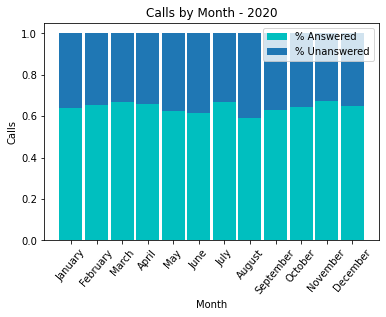

In [122]:
#used percentages to help normalize the data

w = 0.9


plt.bar(month_dist_2020['Month'], month_dist_2020['% Answ'], w, color = 'c', label = '% Answered')
plt.bar(month_dist_2020['Month'], month_dist_2020['% Unansw'], w, label = '% Unanswered', bottom= month_dist_2020['% Answ'])
plt.title("Calls by Month - 2020")
plt.xlabel("Month")
plt.ylabel("Calls")
plt.xticks(rotation=50)
plt.legend()
plt.show()

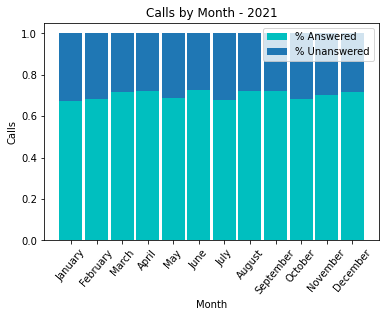

In [123]:
w = 0.9


plt.bar(month_dist_2021['Month'], month_dist_2021['% Answ'], w, color = 'c', label = '% Answered')
plt.bar(month_dist_2021['Month'], month_dist_2021['% Unansw'], w, label = '% Unanswered', bottom= month_dist_2021['% Answ'])
plt.title("Calls by Month - 2021")
plt.xlabel("Month")
plt.ylabel("Calls")
plt.xticks(rotation=50)
plt.legend()
plt.show()

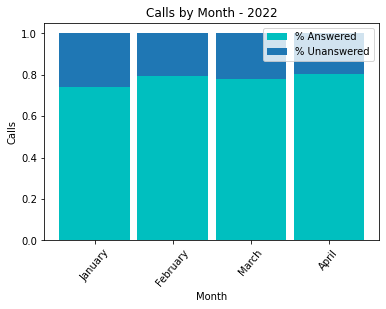

In [124]:
w = 0.9


plt.bar(month_dist_2022['Month'], month_dist_2022['% Answ'], w, color = 'c', label = '% Answered')
plt.bar(month_dist_2022['Month'], month_dist_2022['% Unansw'], w, label = '% Unanswered', bottom= month_dist_2022['% Answ'])
plt.title("Calls by Month - 2022")
plt.xlabel("Month")
plt.ylabel("Calls")
plt.xticks(rotation=50)
plt.legend()
plt.show()

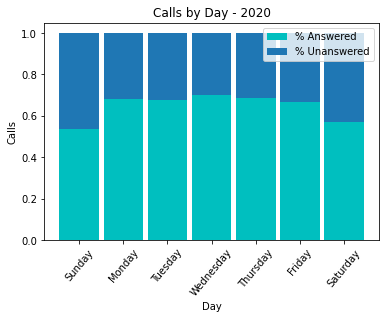

In [129]:
#used percentages to help normalize the data

w = 0.9


plt.bar(day_dist_2020['Day'], day_dist_2020['% Answ'], w, color = 'c', label = '% Answered')
plt.bar(day_dist_2020['Day'], day_dist_2020['% Unansw'], w, label = '% Unanswered', bottom= day_dist_2020['% Answ'])
plt.title("Calls by Day - 2020")
plt.xlabel("Day")
plt.ylabel("Calls")
plt.xticks(rotation=50)
plt.legend()
plt.show()

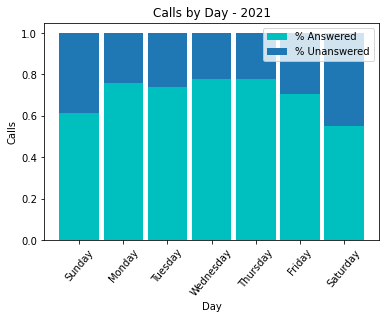

In [133]:
#used percentages to help normalize the data

w = 0.9


plt.bar(day_dist_2021['Day'], day_dist_2021['% Answ'], w, color = 'c', label = '% Answered')
plt.bar(day_dist_2021['Day'], day_dist_2021['% Unansw'], w, label = '% Unanswered', bottom= day_dist_2021['% Answ'])
plt.title("Calls by Day - 2021")
plt.xlabel("Day")
plt.ylabel("Calls")
plt.xticks(rotation=50)
plt.legend()
plt.show()

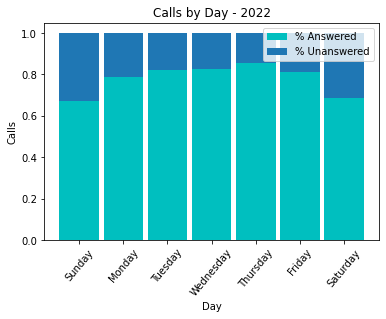

In [132]:
#used percentages to help normalize the data

w = 0.9


plt.bar(day_dist_2022['Day'], day_dist_2022['% Answ'], w, color = 'c', label = '% Answered')
plt.bar(day_dist_2022['Day'], day_dist_2022['% Unansw'], w, label = '% Unanswered', bottom= day_dist_2022['% Answ'])
plt.title("Calls by Day - 2022")
plt.xlabel("Day")
plt.ylabel("Calls")
plt.xticks(rotation=50)
plt.legend()
plt.show()

Goal: Try to add data labels for perecentages -- exploring plt.text() options

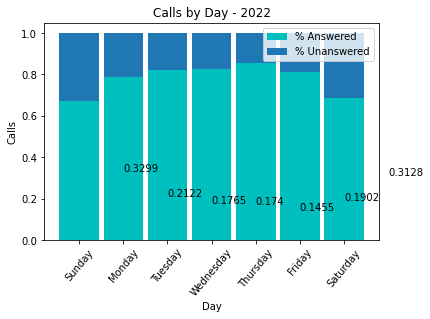

In [142]:
w = 0.9

import matplotlib.pyplot as plt

def add_value_label(x_list,y_list):
    for i in range(1, len(x_list)+1):
        plt.text(i,y_list[i-1],y_list[i-1])


plt.bar(day_dist_2022['Day'], day_dist_2022['% Answ'], w, color = 'c', label = '% Answered')
plt.bar(day_dist_2022['Day'], day_dist_2022['% Unansw'], w, label = '% Unanswered', bottom= day_dist_2022['% Answ'])
add_value_label(day_dist_2022['% Answ'],day_dist_2022['% Unansw'])
plt.title("Calls by Day - 2022")
plt.xlabel("Day")
plt.ylabel("Calls")
plt.xticks(rotation=50)
plt.legend()
plt.show()


KeyError: 0

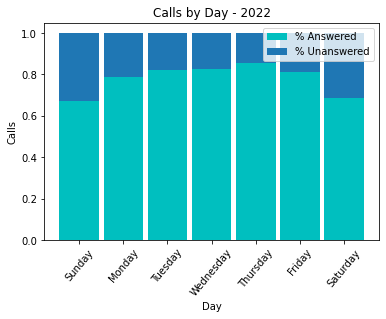

In [146]:
w = 0.9

plt.bar(day_dist_2022['Day'], day_dist_2022['% Answ'], w, color = 'c', label = '% Answered')
plt.bar(day_dist_2022['Day'], day_dist_2022['% Unansw'], w, label = '% Unanswered', bottom= day_dist_2022['% Answ'])
plt.title("Calls by Day - 2022")
plt.xlabel("Day")
plt.ylabel("Calls")
plt.xticks(rotation=50)
plt.legend()


for x in enumerate([*day_dist_2022.index.values]):
    for (proportion) in zip(day_dist_2022.loc[x],
                                   day_dist_2022.loc[x].cumsum()):
                
        plt.text(x=n - 0.17,
                 s=f'{np.round(proportion * 100, 1)}%', 
                 color="black",
                 fontsize=12,
                 fontweight="bold")

plt.show()

https://towardsdatascience.com/how-to-make-bar-and-hbar-charts-with-labels-using-matplotlib-b701ce70ba9c